In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Importing the csv from local folder
#The world_bank file contained a lot of aggragated rows that are not countries
#A lot of missing data points for age GDP and population, these ere removed for this study
#This file was cleaned using data columns and another python program, which used a country list to loop through
# and removed non country rows and missing data rows.
#It compared world_bank data against a list of real countries, using two loops, ensuring the program logged
#position on the country list so the country list got shorter each visit to it.
#This can go on github if required.

world_data = pd.read_csv('world_bank_countries_only.csv')
#A quick look at whats in the original file showed summing non country lines which caused outliner crowding 
#world_data.info

In [3]:
#Because there are such a huge difference in the population sizes in this data set, I will
#try to spread them out by using two graphs with arbitrary cut point of 100 million people
Sorted_by_GDP = world_data.sort_values(by='2019 Population')
Sorted_by_GDP.tail(16)

,Country Name,Country Code,2019 GDP (USD$),2019 Population,Life Expectancy at Birth
92,"Congo, Dem. Rep.",COD,5.040075e+10,86790567,60.368000
136,Vietnam,VNM,2.620000e+11,96462106,75.317000
141,"Egypt, Arab Rep.",EGY,3.030000e+11,100388073,71.825000
147,Philippines,PHL,3.770000e+11,108116615,71.095000
118,Ethiopia,ETH,9.591259e+10,112078730,66.240000
176,Japan,JPN,5.080000e+12,126264931,84.210976
164,Mexico,MEX,1.270000e+12,127575529,74.992000
168,Russian Federation,RUS,1.700000e+12,144373535,72.657317
140,Bangladesh,BGD,3.030000e+11,163046161,72.320000
154,Nigeria,NGA,4.480000e+11,200963599,54.332000


<Figure size 1440x1152 with 0 Axes>

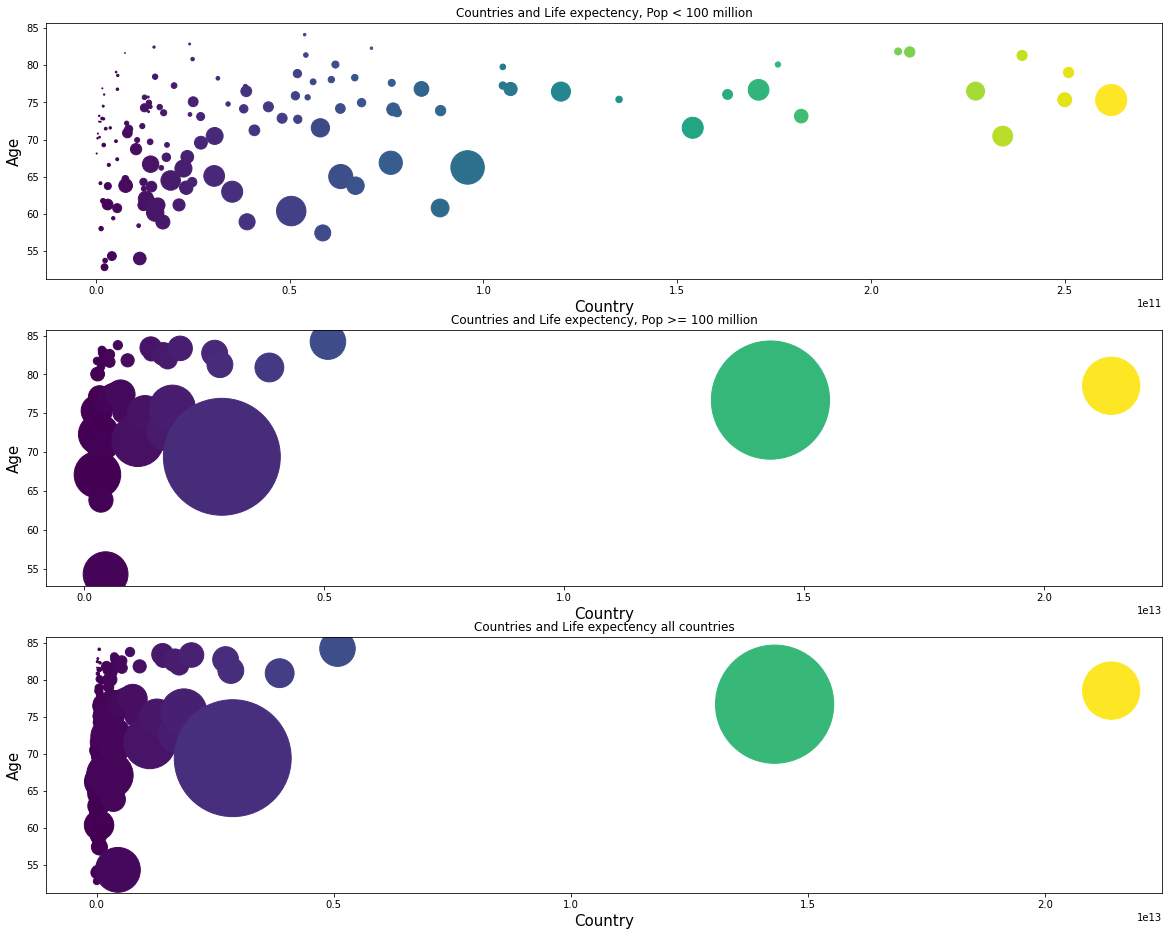

In [10]:
# Set plot frame
fig = plt.figure(figsize=(20,16))

#Set out sub plots/charts

fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(20,16)) 

x = world_data["2019 GDP (USD$)"]
y = world_data["Life Expectancy at Birth"]
volume1 = ((world_data["2019 Population"]/100000))
close1 =  (x/100)

#Find arbitrary population cut off say 100 million, from tail of sorted list
#print("test", world_data["2019 Population"][136])

#The selection of countries < 100 million
x2 = world_data["2019 GDP (USD$)"][136:]
y2 = world_data["Life Expectancy at Birth"][136:]
volume2 = ((world_data["2019 Population"][136:]/100000))
close2 =  (x2/100)

#The selection of countries >= 100 million
x3 = world_data["2019 GDP (USD$)"][:137]
y3 = world_data["Life Expectancy at Birth"][:137]
volume3 = ((world_data["2019 Population"][:137]/100000))
close3 =  (x3/100)

# Set out labels
ax1.set_xlabel('Country', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Countries and Life expectency, Pop < 100 million')

ax2.set_xlabel('Country', fontsize=15)
ax2.set_ylabel('Age', fontsize=15)
ax2.set_title('Countries and Life expectency, Pop >= 100 million')

ax3.set_xlabel('Country', fontsize=15)
ax3.set_ylabel('Age', fontsize=15)
ax3.set_title('Countries and Life expectency all countries')

#Produce the actual plots
ax1.scatter(x3, y3,c = close3,s =volume3)
ax2.scatter(x2, y2,c = close2,s =volume2)
ax3.scatter(x, y,c = close1,s =volume1)

plt.show()

In [5]:
#Putting country names on here would turn into a mess
#If I get time I will look at bonus part